In [205]:
import time
from urllib.error import HTTPError
from urllib.error import URLError

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4

import PyCO2SYS as pyco2

from erddapy import ERDDAP
from erddapy.doc_helpers import show_iframe
from erddapy import servers

import cartopy
cartopy.config['data_dir'] = './maps'
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import cartopy.feature as feat

## Search for carbon data across ERDDAP servers.
Using CF standard_name erddap.com IS A MUCH FASTER WAY

In [113]:
stdnames=['surface_partial_pressure_of_carbon_dioxide_in_sea_water',
    'fugacity_of_carbon_dioxide_in_sea_water',
    'mole_concentration_of_dissolved_inorganic_carbon_in_sea_water',
    'moles_of_dissolved_inorganic_carbon_per_unit_mass_in_sea_water',
    'sea_water_ph_reported_on_total_scale',
    'sea_water_alkalinity_expressed_as_mole_equivalent']

starttime=time.time()

for s in servers:
    e=ERDDAP(s)
    for v in stdnames:
        kw= {"standard_name": v}
        search_url = e.get_search_url(response="csv", **kw)
        try:
            search=pd.read_csv(search_url)
        except HTTPError:
            pass
            #print("No", stdname, "data in the server", s)
        except URLError:
            pass
            #print(s,"throws an URL error")
        else:
            print(s,"has", {len(set(search["tabledap"].dropna()))},"tabledap datasets with",v)
            print(search[["Dataset ID","Title"]])
            if len(set(search["griddap"].dropna())) > 0:
                print(s,"has", {len(set(search["griddap"].dropna()))},"tabledap datasets with",v)

            

endtime=time.time()-starttime
print("\n Search took", endtime/60,"minutes")


emodnet has {3} tabledap datasets with surface_partial_pressure_of_carbon_dioxide_in_sea_water
                         Dataset ID  \
0  EP_ERD_INT_PCO2_AL_TS_MINMAXMEAN   
1         EP_ERD_INT_PCO2_AL_PR_NRT   
2         EP_ERD_INT_PCO2_AL_TS_NRT   

                                               Title  
0  EMODnet Physics - Collection of  (PCO2) TimeSe...  
1  EMODnet Physics - Collection of CO2 Partial Pr...  
2  EMODnet Physics - Collection of CO2 Partial Pr...  
emodnet has {2} tabledap datasets with fugacity_of_carbon_dioxide_in_sea_water
                         Dataset ID  \
0  EP_ERD_INT_FCO2_AL_TS_MINMAXMEAN   
1         EP_ERD_INT_FCO2_AL_TS_NRT   

                                               Title  
0  EMODnet Physics - Collection of  (FCO2) TimeSe...  
1  EMODnet Physics - Collection of CO2 Fugacity (...  
emodnet has {3} tabledap datasets with sea_water_ph_reported_on_total_scale
                         Dataset ID  \
0  EP_ERD_INT_PHPH_AL_TS_MINMAXMEAN   
1         EP

ngdac has {4} tabledap datasets with sea_water_alkalinity_expressed_as_mole_equivalent
                   Dataset ID                       Title
0  ru30-20180502T1355-delayed  ru30-20180502T1355-delayed
1  ru30-20190201T1712-delayed  ru30-20190201T1712-delayed
2  ru30-20190717T1812-delayed  ru30-20190717T1812-delayed
3  ru30-20191015T1824-delayed  ru30-20191015T1824-delayed
pacioos has {5} tabledap datasets with sea_water_ph_reported_on_total_scale
           Dataset ID                                              Title
0   cwb_water_quality  Hawaii Clean Water Branch (CWB) Beach Water Qu...
1   hui_water_quality                Hui O Ka Wai Ola Water Quality Data
2  maui_water_quality    Maui Citizen Science Coastal Water Quality Data
3              WQB-04  PacIOOS Water Quality Buoy 04: Hilo Bay, Big I...
4              WQB-05  PacIOOS Water Quality Buoy 05: Pelekane Bay, B...
sccoos has {1} tabledap datasets with sea_water_ph_reported_on_total_scale
   Dataset ID            Title
0  

rutgers has {1} tabledap datasets with moles_of_dissolved_inorganic_carbon_per_unit_mass_in_sea_water
                Dataset ID                                              Title
0  GLODAP_REP_OBSERVATIONS  Global Ocean Data Analysis Project for Carbon ...
rutgers has {3} tabledap datasets with sea_water_ph_reported_on_total_scale
                  Dataset ID  \
0    GLODAP_REP_OBSERVATIONS   
1  RARITAN_REALTIME_CTD_2017   
2      USGS_MANVILLE_STATION   

                                               Title  
0  Global Ocean Data Analysis Project for Carbon ...  
1  Realtime Conductivity,Temperature,D,CHL, Oxyge...  
2  USGS Station 01400500 at Raritan River, Manville.  
ubc has {1} tabledap datasets with surface_partial_pressure_of_carbon_dioxide_in_sea_water
           Dataset ID                                              Title
0  ubcONCTWDP1mV18-01  ONC, Strait of Georgia, BC Ferries, Tsawwassen...
uaf has {5} tabledap datasets with sea_water_ph_reported_on_total_scale
        

griidc has {10} tabledap datasets with mole_concentration_of_dissolved_inorganic_carbon_in_sea_water
                                        Dataset ID  \
0        R4_x267_179_0028_EN505_WB1205_DICdata_AC5   
1      R4_x267_179_0028_EN505_WB1205_DICdata_DS2_0   
2     R4_x267_179_0028_EN505_WB1205_DICdata_DS3_0d   
3     R4_x267_179_0028_EN505_WB1205_DICdata_DS3_0s   
4      R4_x267_179_0028_EN505_WB1205_DICdata_DS3_6   
5     R4_x267_179_0028_EN505_WB1205_DICdata_DS4_0d   
6     R4_x267_179_0028_EN505_WB1205_DICdata_DS4_0s   
7      R4_x267_179_0028_EN505_WB1205_DICdata_GC600   
8  R4_x267_179_0028_EN505_WB1205_DICdata_GC600_con   
9      R4_x267_179_0028_EN505_WB1205_DICdata_VK906   

                                               Title  
0  Profile - R4.x267.179.0028 - EN505_WB1205_DICd...  
1  Profile - R4.x267.179.0028 - EN505_WB1205_DICd...  
2  Profile - R4.x267.179.0028 - EN505_WB1205_DICd...  
3  Profile - R4.x267.179.0028 - EN505_WB1205_DICd...  
4  Profile - R4.x267.179.0028

Pick servers: emodnet, ioos-sensors, griidc, socat, polarwatch (argo), ifremer (bgc-argo), cmems (https://nrt.cmems-du.eu/erddap/index.html), icos,
Harvest data, check units, scatter map, time/space coverage

pH

In [127]:
i = ERDDAP(server="IFREMER", protocol='tabledap')
#i.constraints={"standard_name": "sea_water_ph_reported_on_total_scale"}
search_url = i.get_search_url(response="csv", **{
    "standard_name": "sea_water_ph_reported_on_total_scale",
    "min_time": "2019-03-01",
    "max_time": "2019-03-15"})
search = pd.read_csv(search_url)
print(search[["Title","Dataset ID"]].values)

i.dataset_id="ArgoFloats-synthetic-BGC"

i.response="csv"
i.constraints= {
    "time>=": "2019-03-01T00:00:00Z",
    "time<=": "2019-03-01T12:00:00Z"}

# Reduce number of variables; total columns is 540
varZname=i.get_var_by_attr(axis="Z")

varsnames=i.get_var_by_attr(
    standard_name=lambda v: v in[
        "sea_water_temperature",
        "sea_water_ph_reported_on_total_scale",
        "latitude","longitude","time"])
varsqcnames=i.get_var_by_attr(
    long_name="quality flag")
i.variables=varsnames+varZname+varsqcnames

dtype=object
df_ifremer = i.to_pandas()
print(df_ifremer.columns)
print(df_ifremer.shape)

[['Argo float synthetic vertical profiles : BGC data'
  'ArgoFloats-synthetic-BGC']]
Index(['ph_in_situ_total (dimensionless)',
       'ph_in_situ_total_adjusted (dimensionless)', 'temp (degree_Celsius)',
       'latitude (degrees_north)', 'longitude (degrees_east)',
       'temp_adjusted (degree_Celsius)', 'time (UTC)', 'time_location (UTC)',
       'pres (decibar)', 'pres_adjusted (decibar)', 'doxy_adjusted_qc',
       'ph_in_situ_total_adjusted_qc', 'temp_adjusted_qc', 'chla_adjusted_qc',
       'bbp700_qc', 'pres_adjusted_qc', 'psal_qc', 'nitrate_adjusted_qc',
       'bbp700_adjusted_qc', 'temp_qc', 'ph_in_situ_total_qc', 'nitrate_qc',
       'pres_qc', 'chla_qc', 'psal_adjusted_qc', 'doxy_qc'],
      dtype='object')
(28746, 26)


In [128]:
vardict ={'id':'ID', 'doi':'Source_DOI','datevec':'DATEVECTOR','unixd':'UNIXDATE',
          'lat':'LATITUDE','lon':'LONGITUDE','dep':'DEPTH', 'pres':'PRESSURE',
          'temp':'TEMPERATURE', 'tempf':'TEMPERATURE_FLAG',
          'sal':'SALINITY','salf':'SALINITY_FLAG',
          'dic' : 'DIC', 'dicf':'DIC_FLAG', 'dicc':'DIC_CALCULATION',
          'alk': 'ALKALINITY', 'alkf':'ALKALINTY_FLAG', 'alkc':'ALKALINITY_CALCULATION',
          'ph': 'pH_TS','phf': 'pH_FLAG','phc': 'pH_CALCULATION',
          'fco2w':'FCO2_W','fco2wf':'FCO2W_FLAG','fco2wc': 'FCO2_CALCULATION','fco2wac':'ACCURACY_FCO2',}
# Change variable names

df_ifremer.rename(
    columns={'latitude (degrees_north)': vardict['lat'], 'longitude (degrees_east)': vardict['lon'],
             'pres_adjusted (decibar)': vardict['pres'], 'time (UTC)': vardict['datevec'],
             'temp_adjusted (degree_Celsius)': vardict['temp'], 'temp_adjusted_qc':vardict['tempf'],
             'ph_in_situ_total_adjusted (dimensionless)': vardict['ph'], 'ph_in_situ_total_qc': vardict['phf']},
        inplace=True)
df_ifremer['SOURCE']='BGC-Argo (IFREMER)'

In [210]:
# EMODNET
i = ERDDAP(server="EMODNET", protocol='tabledap')
search_url = i.get_search_url(response="csv", **{
    "standard_name": "sea_water_ph_reported_on_total_scale",
    "min_time": "2019-03-01",
    "max_time": "2019-03-15"})
search = pd.read_csv(search_url)
print(search[["Title","Dataset ID"]].values)

i.dataset_id="EP_ERD_INT_PHPH_AL_PR_NRT"

i.response="csv"
i.constraints= {
    "time>=": "2019-03-01T00:00:00Z",
    "time<=": "2019-03-01T12:00:00Z"}

# Reduce number of variables; total columns is 540
varZname=i.get_var_by_attr(axis="Z")

varsnames=i.get_var_by_attr(
    standard_name=lambda v: v in[
        "sea_water_temperature",
        "sea_water_ph_reported_on_total_scale",
        "latitude","longitude","time"])
varsqcnames=i.get_var_by_attr(
    long_name="quality flag")
i.variables=varsnames+varZname+varsqcnames

dtype=object
df_emodnet = i.to_pandas()
print(df_emodnet.columns)
print(df_emodnet.shape)
df_emodnet.rename(
    columns={'latitude (degrees_north)': vardict['lat'], 'longitude (degrees_east)': vardict['lon'],
             'pres (dbar)': vardict['pres'], 'time (UTC)': vardict['datevec'],
             'temp_adjusted (degree_Celsius)': vardict['temp'], 'temp_adjusted_qc':vardict['tempf'],
             'PHPH (1)': vardict['ph'], 'ph_in_situ_total_qc': vardict['phf']},
        inplace=True)
df_emodnet['SOURCE']='EMODNET profiles'

[['EMODnet Physics - Collection of  (PHPH) TimeSeries  Min/Max/Mean -  MultiPointTimeSeriesObservation'
  'EP_ERD_INT_PHPH_AL_TS_MINMAXMEAN']
 ['EMODnet Physics - Collection of Ph (PHPH) Profiles -  MultiPointProfileObservation'
  'EP_ERD_INT_PHPH_AL_PR_NRT']
 ['EMODnet Physics - Collection of Ph (PHPH) TimeSeries -  MultiPointTimeSeriesObservation'
  'EP_ERD_INT_PHPH_AL_TS_NRT']]
Index(['time (UTC)', 'PHPH (1)', 'latitude (degrees_north)',
       'longitude (degrees_east)', 'depth (m)', 'pres (dbar)', 'TIME_QC (1)',
       'POSITION_QC (1)', 'PRES_QC (1)', 'DEPTH_QC (1)'],
      dtype='object')
(4004, 10)


array([0, 1], dtype=object)

In [211]:
# Metadata
df.columns

Index(['ph_in_situ_total (dimensionless)', 'pH_TS', 'temp (degree_Celsius)',
       'LATITUDE', 'LONGITUDE', 'TEMPERATURE', 'DATEVECTOR',
       'time_location (UTC)', 'pres (decibar)', 'PRESSURE', 'doxy_adjusted_qc',
       'ph_in_situ_total_adjusted_qc', 'TEMPERATURE_FLAG', 'chla_adjusted_qc',
       'bbp700_qc', 'pres_adjusted_qc', 'psal_qc', 'nitrate_adjusted_qc',
       'bbp700_adjusted_qc', 'temp_qc', 'pH_FLAG', 'nitrate_qc', 'pres_qc',
       'chla_qc', 'psal_adjusted_qc', 'doxy_qc', 'SOURCE', 'PHPH (1)',
       'depth (m)', 'pres (dbar)', 'TIME_QC (1)', 'POSITION_QC (1)',
       'PRES_QC (1)', 'DEPTH_QC (1)'],
      dtype='object')

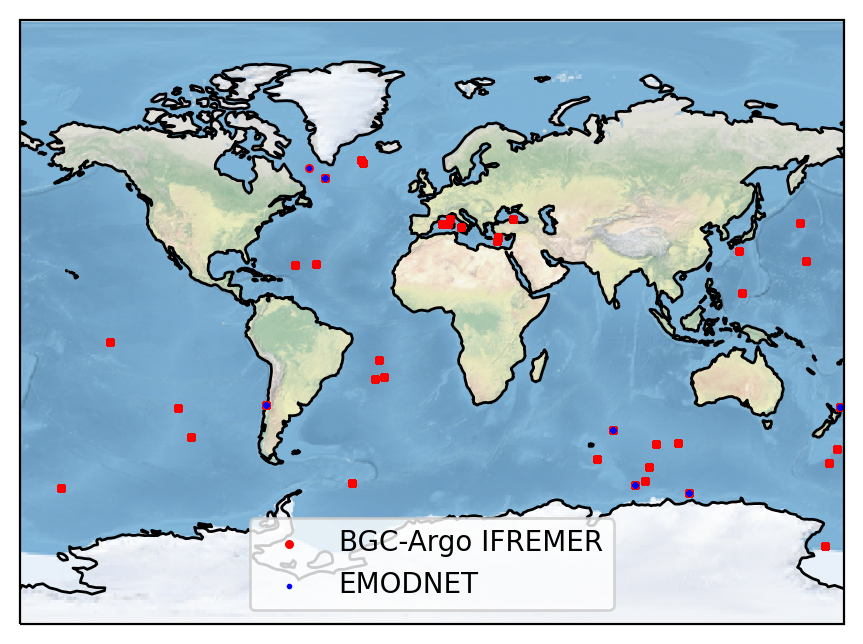

In [253]:
dflist=[df_ifremer,df_emodnet]
df=pd.concat(dflist)

proj=ccrs.cartopy.crs.Miller()
plt.figure(dpi=200)
ax = plt.axes(projection=proj)
if ((df[vardict['lon']].min() < -175) & (df[vardict['lon']].max() > 175) & 
    (df[vardict['lat']].min() <-85) & (df[vardict['lat']].max() > 85)) :
    ax.set_extent([df[vardict['lon']].min()-5,df[vardict['lon']].max()+5, 
                   df[vardict['lat']].max()+5,df[vardict['lat']].min()-5])
ax.stock_img()
ax.coastlines()

sc=ax.scatter(df_ifremer[vardict['lon']],df_ifremer[vardict['lat']],
    c='r',s=5,label='BGC-Argo IFREMER',
    transform=ccrs.PlateCarree())
sc=ax.scatter(df_emodnet[vardict['lon']],df_emodnet[vardict['lat']],
    c='b',s=1,label='EMODNET',
    transform=ccrs.PlateCarree())
    
#plt.colorbar(sc)
ax.legend(loc='lower center')
plt.show()

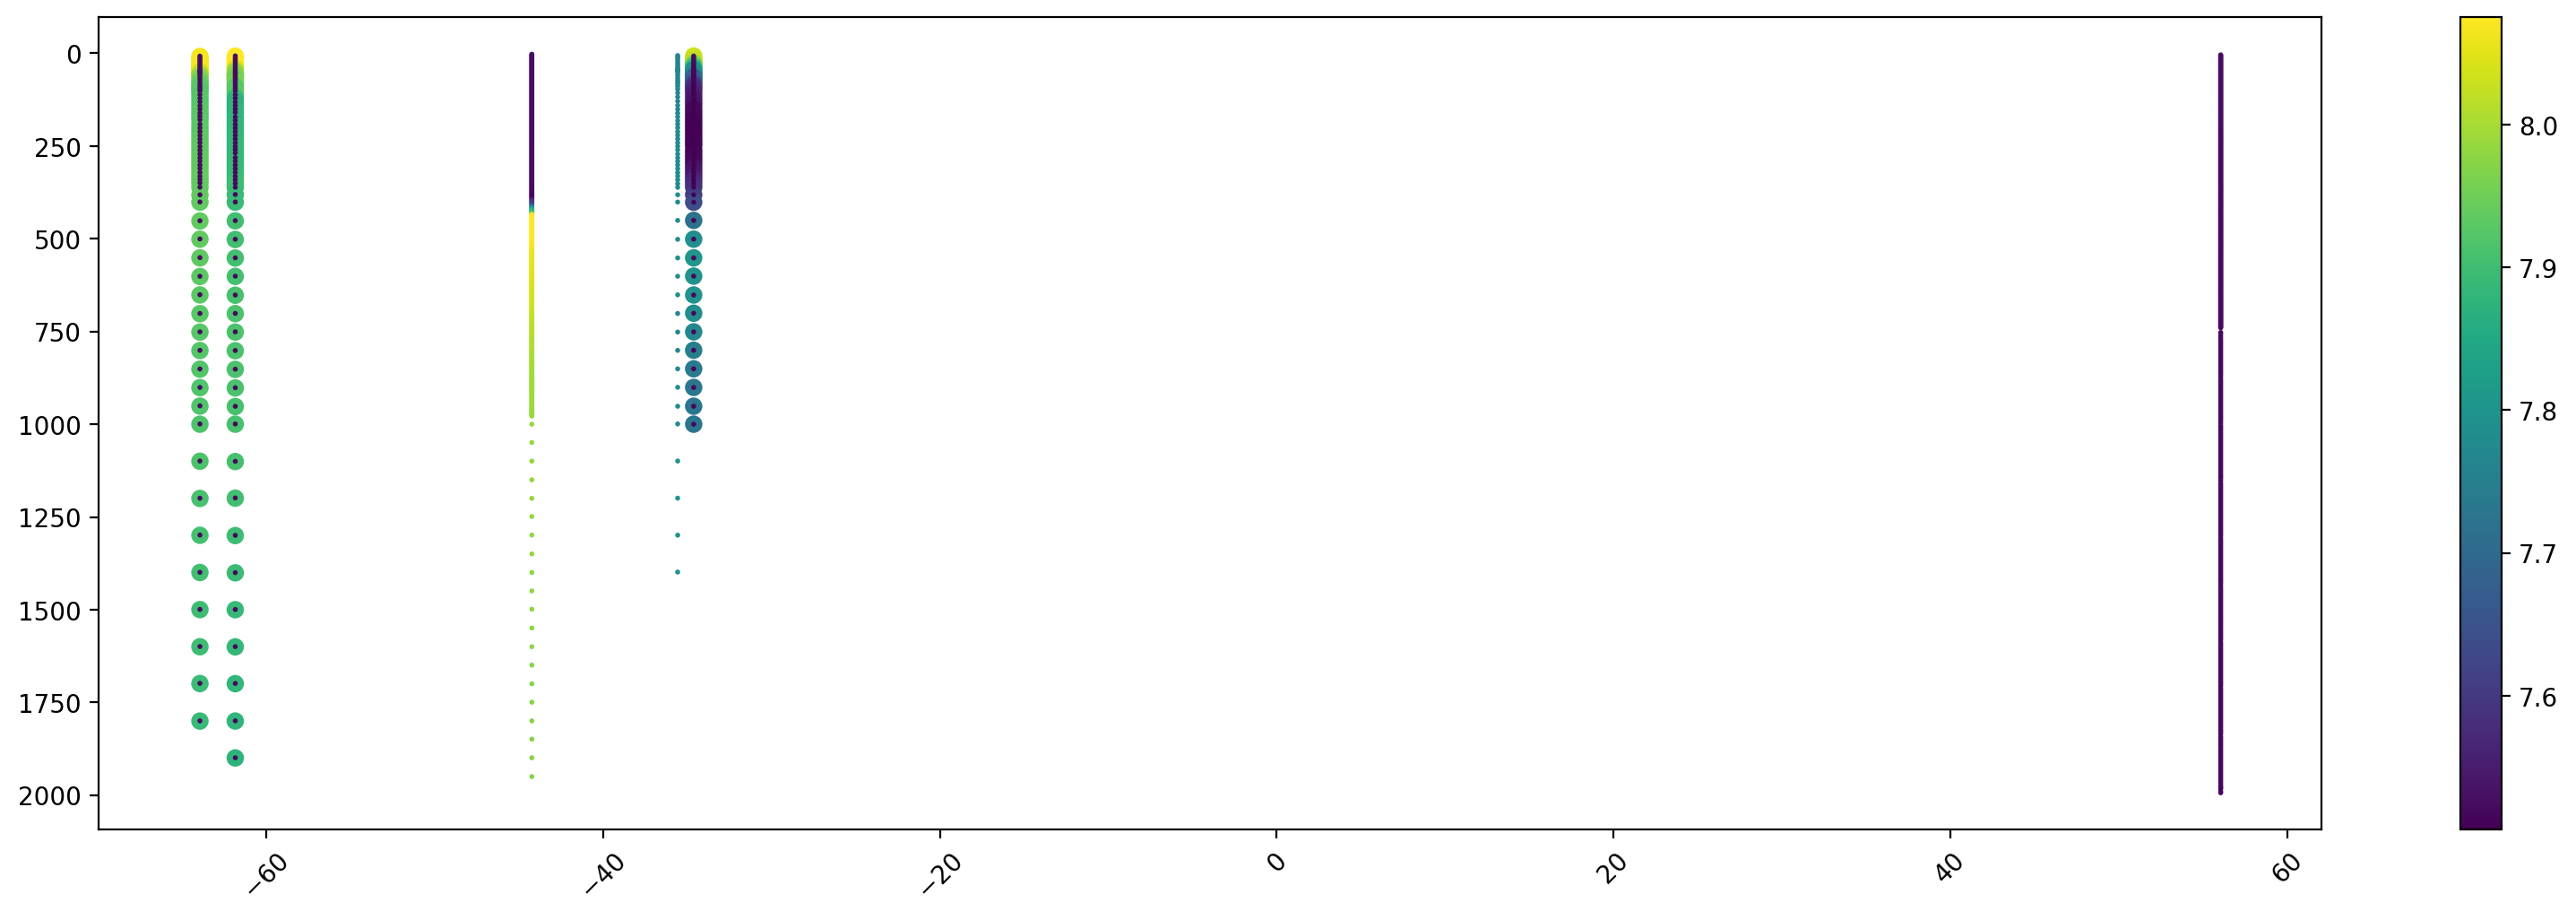

In [255]:
# latitude-depth scatterplots. Atlantic

plt.figure(figsize=(20,6), dpi=200)
ax = plt.axes()
sc=ax.scatter(df_ifremer[vardict['lat']],
           df_ifremer[vardict['pres']],
           c=df_ifremer[vardict['ph']])
#,
#          s=5,label='BGC-Argo IFREMER')
ax.scatter(df_emodnet[vardict['lat']],
           df_emodnet[vardict['pres']],
           c=df_emodnet[vardict['ph']],
           s=1,label='EMODNET')
plt.xticks(rotation=45);
ax.invert_yaxis();
plt.colorbar(sc);
#ax.legend(loc='lower center')


In [261]:
df_ifremer[vardict['phf']].unique

<bound method Series.unique of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
28741    NaN
28742    NaN
28743    NaN
28744    NaN
28745    NaN
Name: pH_FLAG, Length: 28746, dtype: object>

In [ ]:
# Alkalinity


In [ ]:
# Surface pCO2/fCO2


## fCO2 from SOCAT (Time series from Station M, observations from 2015, 2000 vs 2020)

In [ ]:
socatdoi='10.25921/yg69-jd96' # The SOCAT collection DOI info is not in ERDDAP (or can't find it)
flagaccuracy = {"A": 2.0, "B": 2.0, "C": 5.0, "D": 5.0, "E": 10.0}

In [ ]:
e = ERDDAP(
        server='https://data.pmel.noaa.gov/socat/erddap',
        protocol='tabledap',
    )

e.response = 'csv'
e.dataset_id = 'socat_v2021_fulldata' # observations
e.constraints = {
        'platform_name=': "Station M",
        'WOCE_CO2_water=': "2" # only data flagged as "good"
    }
e.variables = ['expocode','time','latitude','longitude','depth','sal','temp',
                   'fCO2_recommended','qc_flag','WOCE_CO2_water','socat_doi']

tempdf = e.to_pandas(dtype={10: str, 8: str, 0: str})

    # Retain only valid fco2 values (can't figure out how to do it in erdappy constrains yet)
tempdf=tempdf.dropna(subset=['fCO2_recommended (uatm)']).copy()
tempdf.reset_index(drop=True, inplace=True)

    # Rename columns
tempdf.rename(
        columns={'expocode': vardict['id'], 'socat_doi':vardict['doi'],
                 'latitude (degrees_north)': vardict['lat'], 'longitude (degrees_east)': vardict['lon'],
                 'depth (m)': vardict['dep'], 'temp (degrees C)': vardict['temp'], 'sal (PSU)': vardict['sal'],
                 'fCO2_recommended (uatm)': vardict['fco2w'], 'WOCE_CO2_water': vardict['fco2wf'],
                 'qc_flag':'Cruise_flag'},
        inplace=True)

commonvars = [i for i in outputvars if i in tempdf.columns]
socat_sm = tempdf.copy()
socat_sm['DATEVECTOR1'] = pd.to_datetime(socat_sm['time (UTC)'])

    # Create python date object
#tempdf['DATEVECTOR1'] = pd.to_datetime(tempdf['time (UTC)'])
#tempdf[vardict['unixd']] = tempdf['DATEVECTOR1'].astype('int64') // 10 ** 9
#tempdf[vardict['datevec']] = tempdf['DATEVECTOR1'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')

In [ ]:
plt.figure(figsize=(12,6))
ax = plt.axes()
socat_sm.plot(x='DATEVECTOR1', y=vardict['fco2w'],ax=ax, 
                linestyle='None', marker='o',grid='on', legend=True)
plt.show()




In [ ]:
# SOCAT grid


In [ ]:
e.constraints = {
        'time>=': mindate,
        'time<=': maxdate,
        'latitude>=': minlat,
        'latitude<=': maxlat,
        'longitude>=': minlon,
        'longitude<=': maxlon,
        'WOCE_CO2_water=': "2" # only data flagged as "good"
    }

tempdf = e.to_pandas(dtype={10: str, 8: str, 0: str})

    # Retain only valid fco2 values (can't figure out how to do it in erdappy constrains yet)
tempdf=tempdf.dropna(subset=['fCO2_recommended (uatm)']).copy()
tempdf.reset_index(drop=True, inplace=True)

    # Rename columns
tempdf.rename(
        columns={'expocode': vardict['id'], 'socat_doi':vardict['doi'],
                 'latitude (degrees_north)': vardict['lat'], 'longitude (degrees_east)': vardict['lon'],
                 'depth (m)': vardict['dep'], 'temp (degrees C)': vardict['temp'], 'sal (PSU)': vardict['sal'],
                 'fCO2_recommended (uatm)': vardict['fco2w'], 'WOCE_CO2_water': vardict['fco2wf'],
                 'qc_flag':'Cruise_flag'},
        inplace=True)

commonvars = [i for i in outputvars if i in tempdf.columns]
socat_area = tempdf.copy()
socat_area['DATEVECTOR1'] = pd.to_datetime(socat_area['time (UTC)'])

In [ ]:
plt.figure(figsize=(12,6))
ax = plt.axes()
socat_area.plot(x='DATEVECTOR1', y=vardict['fco2w'],ax=ax, 
                linestyle='None', marker='o',grid='on', legend=True)
plt.show()

In [ ]:
df=socat_area.copy()

proj=ccrs.cartopy.crs.Miller()
plt.figure(dpi=150)
ax = plt.axes(projection=proj)
if ((minlon != -180) & (maxlon != 180) & (minlat !=-90) & (maxlat != 90)) :
    ax.set_extent([minlon-5,maxlon+5, 
                   maxlat+5,minlat-5])
ax.stock_img()
ax.coastlines()
sc=ax.scatter(df[vardict['lon']],df[vardict['lat']],
              c=df[vardict['fco2w']],s=0.2, label= "fCO2 (uatm)",
             transform=ccrs.PlateCarree())
plt.colorbar(sc)
ax.legend()
plt.show()

In [ ]:
#import netCDF4
socat_g = ERDDAP(
  server='http://erddap.sochic-h2020.eu/erddap',
  protocol='griddap',
  response="opendap",

)
socat_g.dataset_id = 'SOCATv2020_tracks_gridded_decadal'

df_socatgrid = socat_g.to_pandas()
df_socatgrid



In [ ]:

fco2plot=df_socatgrid['fco2_ave_weighted_decade']
p = fco2plot.isel(time=4).plot(
   subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor="gray"),
   transform=ccrs.PlateCarree(),
  )
p.axes.set_global()
p.axes.coastlines()


## GLODAP observations surface fCO2 and gridded

In [ ]:
filespathremote = 'https://www.ncei.noaa.gov/data/oceans/ncei/ocads/data/0237935/' #only applicable to GLODAP for now


In [ ]:


#    if 'df' not in globals():
#        df = printdf
#    else:
#        df = df.append(printdf)


In [ ]:
# Change format to integer for flags
#allflags=[vardict['salf']]
#df[vardict['salf']] = df[vardict['salf']].astype('UInt8')
#df[vardict['dicf']] = df[vardict['dicf']].astype('UInt8')
#df[vardict['alkf']] = df[vardict['alkf']].astype('UInt8')
#df[vardict['phf']] = df[vardict['phf']].astype('UInt8')
df[vardict['fco2wf']] = df[vardict['fco2wf']].astype('UInt8')
#df[vardict['fco2wc']] = df[vardict['fco2wc']].astype('UInt8')

# Keep only wanted columns

commonvars = [i for i in outputvars if i in df.columns]
df = df[commonvars].copy()


In [ ]:
plt.figure(figsize=(12,6))
ax = plt.axes()
printdf.plot(x='DATEVECTOR1', y=vardict['fco2w'],ax=ax, 
                linestyle='None', marker='o',grid='on', legend=True)
plt.show()

In [ ]:
printdf.DATEVECTOR1.astype

In [ ]:
proj=ccrs.cartopy.crs.Miller()
plt.figure(dpi=150)
ax = plt.axes(projection=proj)
if ((minlon != -180) & (maxlon != 180) & (minlat !=-90) & (maxlat != 90)) :
    ax.set_extent([minlon-5,maxlon+5, 
                   maxlat+5,minlat-5])
ax.stock_img()
ax.coastlines()
sc=ax.scatter(df[vardict['lon']],df[vardict['lat']],
              c=df[vardict['fco2w']],s=0.2, label= "fCO2 (uatm)",
             transform=ccrs.PlateCarree())
plt.colorbar(sc)
ax.legend()
plt.show()